# Business analytics project

## Data exploration

Customer Table

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
customer_table = pd.read_excel('customer.xlsx')
document_table = pd.read_excel('Document.xlsx')
customer_table.head()
# 30397 customers
# 1212 Cities

,Customer code,Day of birth,Month of birth,Year of birth,City,Post code
0,935,NaN,NaN,NaN,ROMA,144.0
1,2045,NaN,NaN,1957.0,GUASTALLA,42016.0
2,3533,NaN,NaN,NaN,ROMA,146.0
3,6740,7.0,9.0,1979.0,MONTECCHIO EMILIA,42027.0
4,12630,NaN,NaN,NaN,ANGUILLARA SABAZIA,61.0


Basket Table

In [4]:
basket_table = pd.read_csv('basket.csv', sep=';')
basket_table.head()

,Document n.,SKU,Name,Class,Item value,Item type
0,25519,25110232020012,MODICA,51,32,GARMENTS
1,25519,58720743050601,GESSICA,87,39,GARMENTS
2,25519,85449820050011,FOUL-AI,54,15,GARMENTS
3,25519,85449830050011,FOUL-AI,54,15,GARMENTS
4,25519,58720743050611,GESSICA,87,39,GARMENTS


Color Table

In [6]:
color_table = pd.read_csv('colour.txt', sep='\t')
color_table.head(5)

,COLORE,DESCR_COLORE
0,1,bianco ottico
1,2,sabbia greggio naturale
2,3,beige
3,4,cammello
4,5,biscotto


Class Table

In [5]:
class_table = pd.read_csv('class.csv', sep=';')
class_table.head(5)

,Class,Description
0,1,Coat
1,2,Overcoat-Raincoat
2,3,Coat + 1 piece
3,4,Jacket
4,5,Jacket + Skirt


Document Table

In [3]:
document_table.head()

,Document n#,Document date,Document time,Type of operation,Customer code
0,22570,20140620,114834,VENDITA,1151458
1,22570,20140620,114834,VENDITA,1151458
2,22570,20140620,114834,VENDITA,1151458
3,22570,20140620,114834,VENDITA,1151458
4,31964,20140730,195209,VENDITA,4713416


## Data Analysis 

Year of birth distribution of our customers

height has been deprecated.



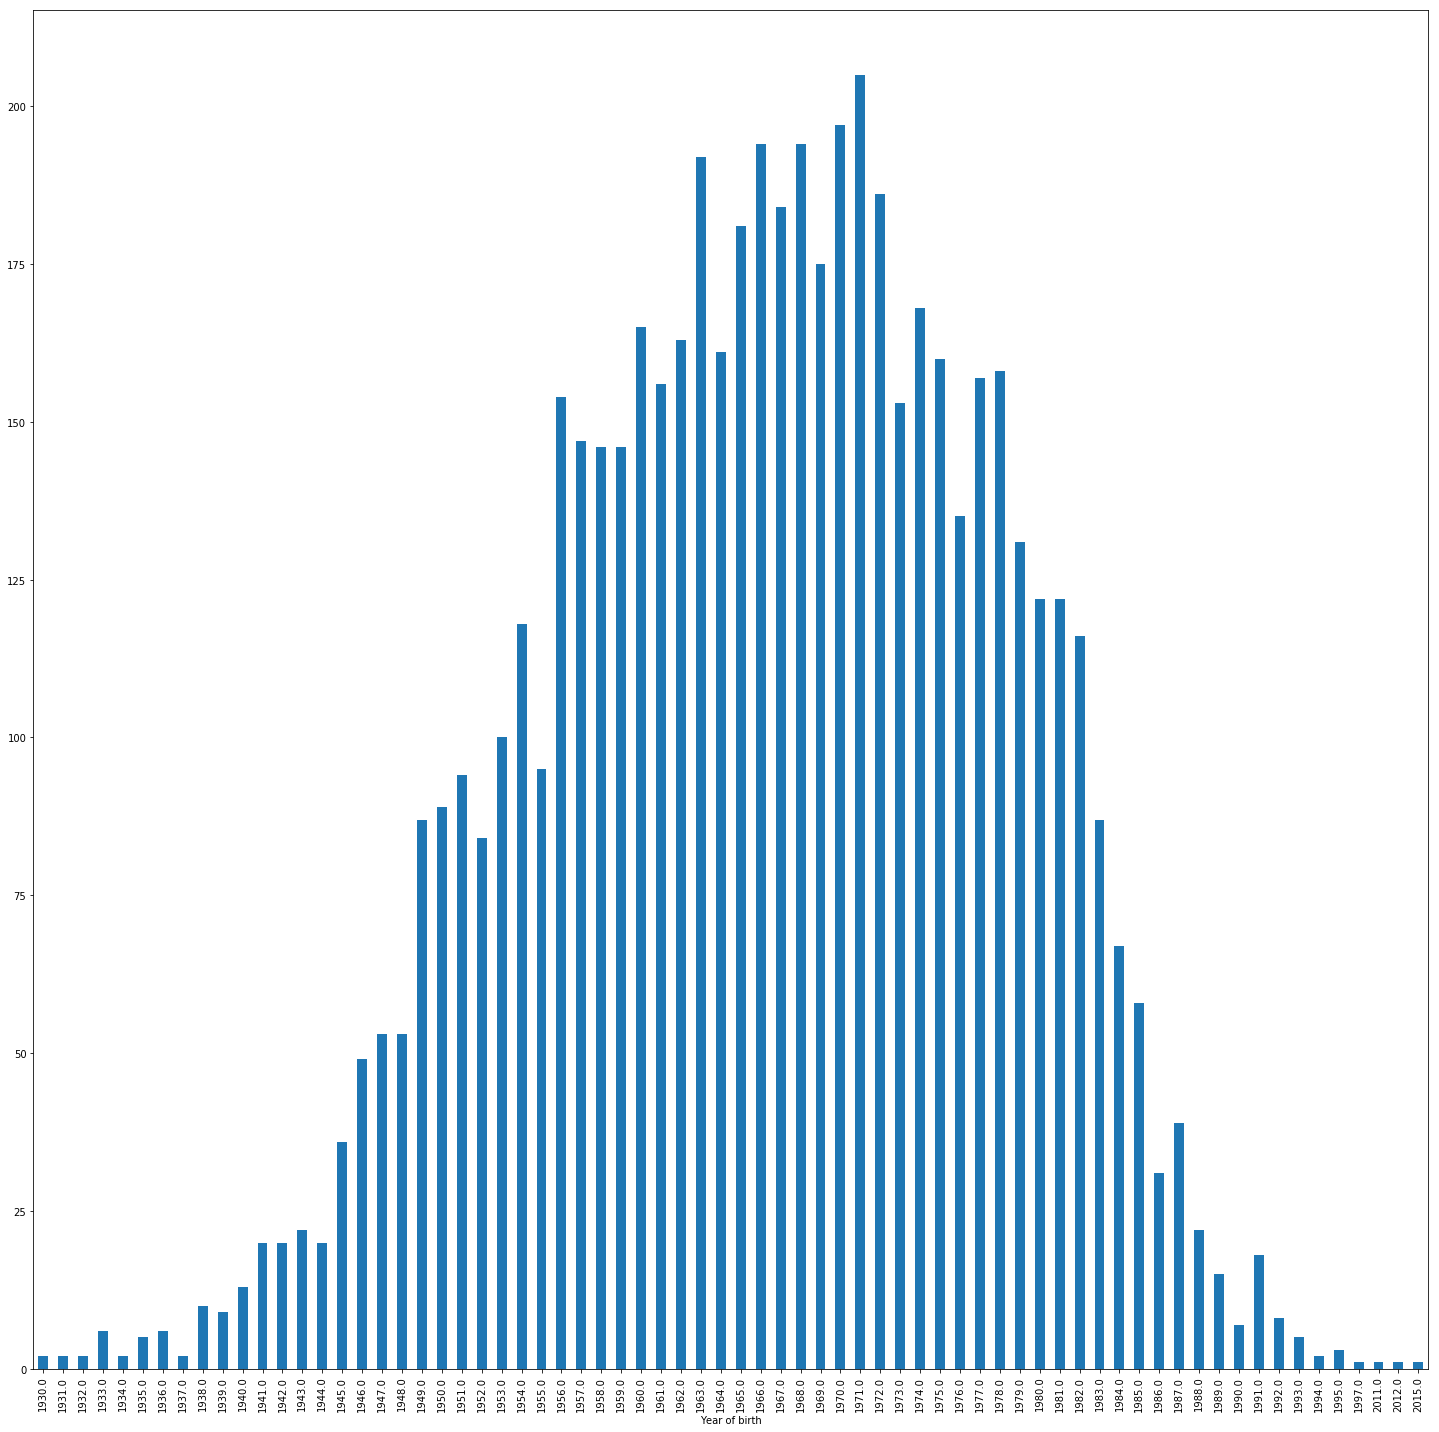

In [29]:
plt.rcParams.update({'font.size': 10})

pd.set_option('display.height', 5000)
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 2000)


plt.figure(figsize=(25,25))
# here we delete some of our customers that their year of birth is not valid
customer_table = customer_table[customer_table['Year of birth']>=1930]

cust_table_byyear = customer_table.groupby("Year of birth")
cust_table_byyear
count_of_year_of_birth_for_everycustomer = cust_table_byyear["Customer code"].count()
count_of_year_of_birth_for_everycustomer.plot(kind='bar')
plt.show()

Mean Year Of Birth for our customers

In [3]:
customer_table["Year of birth"].mean()

1966.3711843711844

Oldest customers Year of Birth

In [31]:
customer_table["Year of birth"].min()


1930.0

Youngest customers Year Of Birth

In [32]:
customer_table["Year of birth"].max()

2015.0

Customers per City, cities bellow the threshold of 500 customers are grouped as Other


height has been deprecated.



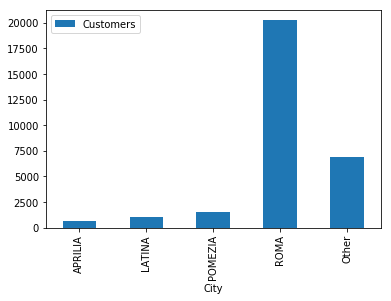

In [72]:
plt.rcParams.update({'font.size': 10})

pd.set_option('display.height', 5000)
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 2000)

customer_table_bycity = customer_table.groupby("City")


count_of_customer_table_bycity = customer_table_bycity["Customer code"].count().reset_index()
top_cities_table = count_of_customer_table_bycity[count_of_customer_table_bycity>=500]
sum_of_other_cust = count_of_customer_table_bycity[count_of_customer_table_bycity<500].sum()
top_cities_table.loc["Other"]=  sum_of_other_cust

# Replacing the original table with top cities in customer size
count_of_customer_table_bycity2.columns = ['City', 'Customers']

count_of_customer_table_bycity2.plot(count_of_customer_table_bycity2["City"],kind='bar')
plt.show()


In [48]:
count_of_customer_table_bycity

,City,Customers
0,APRILIA,642
1,LATINA,1016
2,POMEZIA,1476
3,ROMA,20229
4,Other,6905


Visits per Cluster

height has been deprecated.



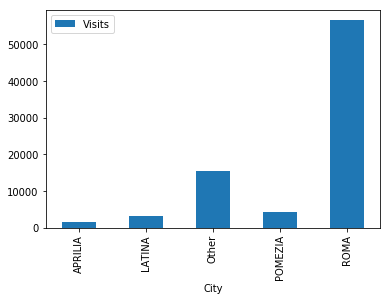

In [76]:
plt.rcParams.update({'font.size': 10})

pd.set_option('display.height', 5000)
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 2000)
customer_table_bycity = customer_table.groupby("City")


count_of_customer_table_bycity = customer_table_bycity["Customer code"].count()
top_cities_table = count_of_customer_table_bycity[count_of_customer_table_bycity>=500]
sum_of_other_cust = count_of_customer_table_bycity[count_of_customer_table_bycity<500].sum()
top_cities_table.loc["Other"]=  sum_of_other_cust

# Replacing the original table with top cities in customer size
count_of_customer_table_bycity = top_cities_table.to_frame().reset_index()
count_of_customer_table_bycity.columns = ['City', 'Customers']

# merging the customer_table with the document_table so that we can figure out the activity of customers
visits = pd.merge(customer_table,document_table,how='inner',on='Customer code')
allvisits = visits['Document n#'].count()

# merging the two tables in order to get the data for the top cities per customer
top_cities_data = pd.merge(count_of_customer_table_bycity,visits,how='left',on='City')

count_of_each_purchase_per_city = top_cities_data.groupby('City')['Document n#'].count()
count_of_customer_table_bycity = count_of_each_purchase_per_city.to_frame()
count_of_customer_table_bycity.columns = ['Visits']

allvisitswithoutother = count_of_customer_table_bycity["Visits"].sum()
othervisits = allvisits - allvisitswithoutother

count_of_customer_table_bycity.loc["Other"] = othervisits
count_of_customer_table_bycity.head(50)
count_of_customer_table_bycity.plot(kind='bar')
count_of_customer_table_bycity.plot
plt.show()



In [77]:
count_of_customer_table_bycity

,Visits
City,
APRILIA,1505
LATINA,3233
Other,15526
POMEZIA,4157
ROMA,56546


mean basket size

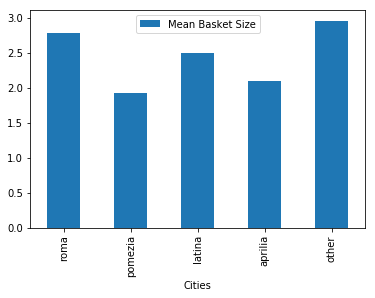

In [83]:
basket_table = pd.read_csv('basket.csv', sep=';')
basket_table
# we groupby by document n. and then we add the size of each one with the column count
count_of_each_docnum = basket_table.groupby(['Document n.']).size().reset_index(name='count')
count_of_each_docnum

document_table = pd.read_excel('Document.xlsx')
document_table.rename(columns={'Document n#': 'Document n.'}, inplace=True) 

document_table_with_count = pd.merge(count_of_each_docnum,document_table,how='inner',on='Document n.')

cust_table_with_count = pd.merge(customer_table,document_table_with_count,how='inner',on='Customer code')
customercode_groupby = cust_table_with_count.groupby('Customer code').last()
# we groupby by city and calculcate the mean document n. per city which is the mean basket size
customercode_groupby = customercode_groupby.groupby('City')['count'].mean()

customercode_groupby = customercode_groupby.to_frame().reset_index()
customercode_groupby.columns = ['City', 'Mean Basket Size']
customercode_groupby.set_index('City', inplace=True)

# here we cluster our data according to our 5 cities
roma = customercode_groupby.loc["ROMA"]['Mean Basket Size']
customercode_groupby.drop("ROMA",axis=0,inplace=True)
pomezia = customercode_groupby.loc["POMEZIA"]['Mean Basket Size']
customercode_groupby.drop("POMEZIA",axis=0,inplace=True)
latina = customercode_groupby.loc["LATINA"]['Mean Basket Size']
customercode_groupby.drop("LATINA",axis=0,inplace=True)
aprilia = customercode_groupby.loc["APRILIA"]['Mean Basket Size']
customercode_groupby.drop("APRILIA",axis=0,inplace=True)
other_mean = customercode_groupby['Mean Basket Size'].mean()

final = pd.DataFrame({'Cities':['roma','pomezia','latina','aprilia','other'],
                        'Mean Basket Size':[roma, pomezia,latina, aprilia, other_mean]})
final.set_index('Cities', inplace=True)
final.plot(kind='bar')

plt.show()

number of product categories for our customers

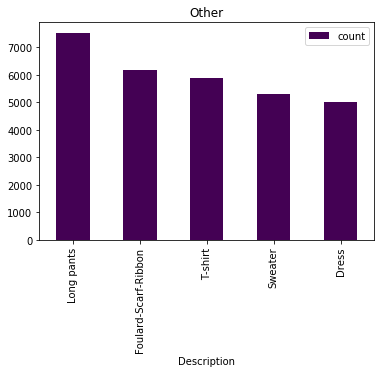

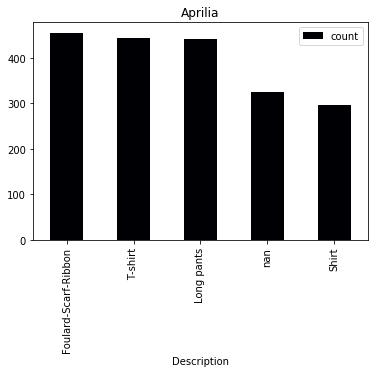

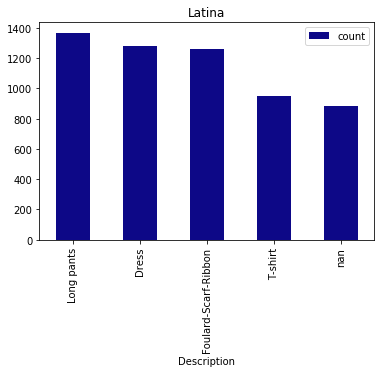

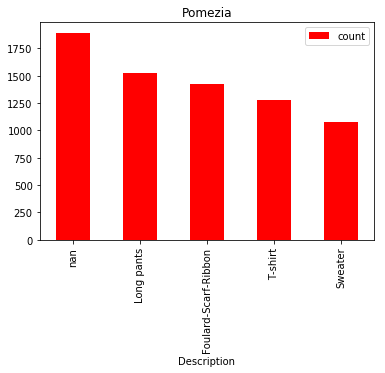

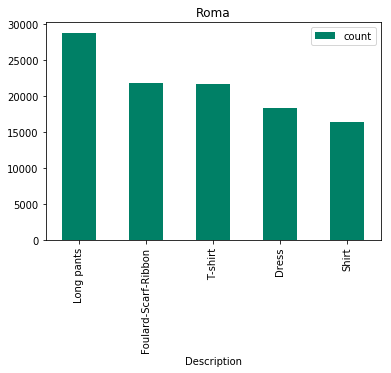

In [106]:
class_table = pd.read_csv('class.csv', sep=';')

document_and_basket_table = pd.merge(basket_table,document_table,how='inner',on='Document n.')
document_and_basket_and_customer_table = pd.merge(document_and_basket_table,customer_table,how='inner',on='Customer code')
# here we get the size of each class and city combination, then it is stored in a column called count
count_of_each_type = document_and_basket_and_customer_table.groupby(['Class','City']).size().reset_index(name='count')
count_of_each_type
# we get the top 5 product classes for each cluster
roma_count_class = count_of_each_type.loc[count_of_each_type['City'] == 'ROMA']
roma_count_class = roma_count_class.sort_values("count", ascending=False)
roma_count_class = roma_count_class[:5]
# we merge with the class table to get the class description
roma_count_class = pd.merge(roma_count_class,class_table,how='left',on='Class')

pomezia_count_class = count_of_each_type.loc[count_of_each_type['City'] == 'POMEZIA']
pomezia_count_class = pomezia_count_class.sort_values("count", ascending=False)
pomezia_count_class = pomezia_count_class[:5]
pomezia_count_class = pd.merge(pomezia_count_class,class_table,how='left',on='Class')

latina_count_class = count_of_each_type.loc[count_of_each_type['City'] == 'LATINA']
latina_count_class = latina_count_class.sort_values("count", ascending=False)
latina_count_class = latina_count_class[:5]
latina_count_class = pd.merge(latina_count_class,class_table,how='left',on='Class')

aprilia_count_class = count_of_each_type.loc[count_of_each_type['City'] == 'APRILIA']
aprilia_count_class = aprilia_count_class.sort_values("count", ascending=False)
aprilia_count_class = aprilia_count_class[:5]
aprilia_count_class["City"] = "Aprilia"
aprilia_count_class = pd.merge(aprilia_count_class,class_table,how='left',on='Class')

other_count_class = count_of_each_type.loc[(count_of_each_type['City'] != 'APRILIA') & (count_of_each_type['City'] != 'LATINA') & (count_of_each_type['City'] != 'POMEZIA') & (count_of_each_type['City'] != 'ROMA') ]

other_count_class = other_count_class.groupby(["Class"])['count'].sum()

other_count_class = other_count_class.to_frame().reset_index()
other_count_class.columns = ['Class', 'count']
other_count_class = other_count_class.sort_values("count", ascending=False)
other_count_class = other_count_class[:5]
other_count_class['City'] = "Other"
# we plot each cluster
other_count_class = pd.merge(other_count_class,class_table,how='left',on='Class')
other_count_class.drop("Class",axis=1, inplace=True)
other_count_class.plot(other_count_class["Description"],kind='bar', colormap="viridis")
plt.title('Other')


aprilia_count_class.drop("Class",axis=1, inplace=True)
aprilia_count_class.plot(aprilia_count_class["Description"],kind='bar', colormap="inferno")
plt.title('Aprilia')

latina_count_class.drop("Class",axis=1, inplace=True)
latina_count_class.plot(latina_count_class["Description"],kind='bar', colormap="plasma" )
plt.title('Latina')

pomezia_count_class.drop("Class",axis=1, inplace=True)
pomezia_count_class.plot(pomezia_count_class["Description"],kind='bar', colormap="autumn" )
plt.title('Pomezia')

roma_count_class.drop("Class",axis=1, inplace=True)
roma_count_class.plot(roma_count_class["Description"],kind='bar', colormap="summer" )
plt.title('Roma')
plt.show()

total cost per cluster

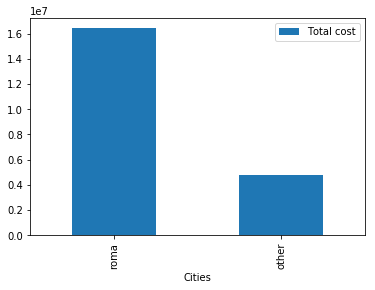

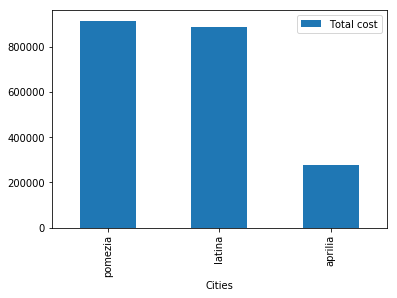

,Total cost
Cities,
pomezia,915777
latina,889042
aprilia,277729


In [115]:
df = pd.read_excel('customer.xlsx')
cust_table = pd.read_excel('customer.xlsx')
document_table = pd.read_excel('Document.xlsx')

basket_table.rename(columns={'Document n.': 'Document n#'}, inplace=True) 
document_and_basket_table = pd.merge(basket_table,document_table,how='inner',on='Document n#')
# we get the sum of each item value grouped by city
all_tables = pd.merge(cust_table,document_and_basket_table,how='inner',on='Customer code')
all_tables = all_tables.groupby('City')['Item value'].sum()

all_tables = all_tables.to_frame().reset_index()
all_tables.columns = ['City', 'Total cost']

all_tables.set_index('City', inplace=True)

roma = all_tables.loc["ROMA"]['Total cost'] 
all_tables.drop("ROMA",axis=0,inplace=True)


pomezia = all_tables.loc["POMEZIA"]['Total cost'] 
all_tables.drop("POMEZIA",axis=0,inplace=True)

latina = all_tables.loc["LATINA"]['Total cost'] 
all_tables.drop("LATINA",axis=0,inplace=True)

aprilia = all_tables.loc["APRILIA"]['Total cost'] 
all_tables.drop("APRILIA",axis=0,inplace=True)
other_sum = all_tables['Total cost'].sum() 

final = pd.DataFrame({'Cities':['pomezia','latina','aprilia'],
                        'Total cost':[ pomezia,latina, aprilia]})
roma_and_other = pd.DataFrame({'Cities':['roma','other'],
                        'Total cost':[roma,  other_sum]})
# results are /1000
final.set_index('Cities', inplace=True)
roma_and_other.set_index('Cities', inplace=True)
roma_and_other.plot(kind='bar')
final.plot(kind='bar')
plt.show()
final

Sales per month

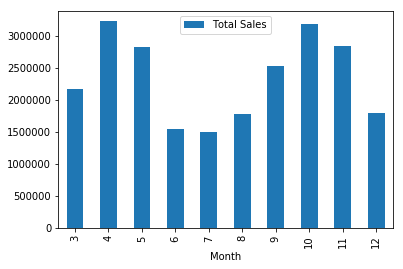

In [116]:
document_basket_table = pd.merge(basket_table,document_table,how='right',on='Document n#')

document_basket_table['Document year'] = 'Document year'
document_basket_table['Document month'] = 'Document month'
# the year is the first 4 places in document date column
document_basket_table['Document year'] = document_basket_table['Document date'].apply(lambda x: int(str(x)[0:4]))
# the month is in the places 4 & 5 in the document date column
document_basket_table['Document month'] = document_basket_table['Document date'].apply(lambda x: int(str(x)[4:6]))
# we groupby document month and get the sum item value for each one
year14_per_month_sales = document_basket_table.groupby('Document month')['Item value'].sum()

year14_per_month_sales = year14_per_month_sales.to_frame().reset_index()
year14_per_month_sales.columns = ['Month', 'Total Sales']
year14_per_month_sales.set_index('Month', inplace=True)

year14_per_month_sales.plot(kind='bar')

plt.show()

Mean basket size

In [64]:
count_of_each_docnum = basket_table.groupby(['Document n#']).size().reset_index(name='count')
mean_basket_size = count_of_each_docnum['count'].mean()
mean_basket_size


2.9893668081964186

Sum cost per basket

In [66]:
documentnum_sum_amount = basket_table.groupby('Document n#')['Item value'].sum()
documentnum_sum_amount  = documentnum_sum_amount .to_frame().reset_index()
documentnum_sum_amount.columns = ['Basket', 'Sum']
documentnum_sum_amount['Sum'].mean()

174.18050581502678

Mean number of categories per basket

In [68]:
count_of_each_docnum = basket_table.groupby('Document n#')['Class'].nunique()

count_of_each_docnum = count_of_each_docnum.to_frame().reset_index()
count_of_each_docnum.columns = ['Document n.', 'Num of unique categories']
mean_category = count_of_each_docnum['Num of unique categories'].mean()
mean_category

2.336533136422374

Which product categories are more frequently bought and which ones are not

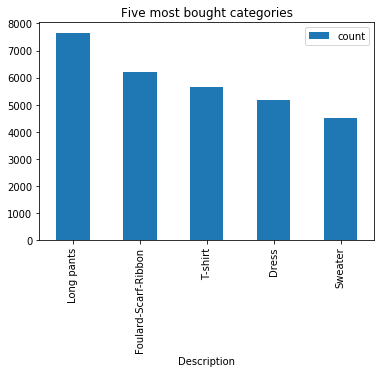

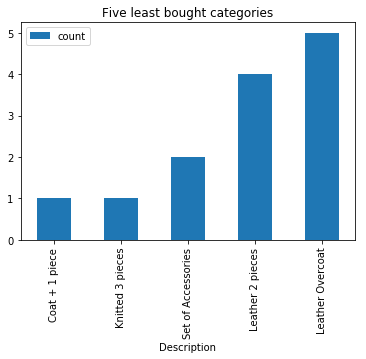

In [72]:
# we count the size of each class in the basket table
count_of_each_class = basket_table.groupby(['Class']).size().reset_index(name='count')
max_class_count = count_of_each_class.sort_values(by=['count'], ascending=False)
# we get the top 5
five_max_classes = max_class_count[:5]

min_class_count = count_of_each_class.sort_values(by=['count'])
# we get the bottom 5
five_min_classes = min_class_count[:5]


five_min_classes_withdescription = pd.merge(five_min_classes,class_table,how='left',on='Class')
five_max_classes_withdescription = pd.merge(five_max_classes,class_table,how='left',on='Class')

five_min_classes_withdescription = five_min_classes_withdescription.set_index('Class')
five_min_classes_withdescription = five_min_classes_withdescription.set_index('Description')

five_max_classes_withdescription = five_max_classes_withdescription.set_index('Class')
five_max_classes_withdescription = five_max_classes_withdescription.set_index('Description')

five_max_classes_withdescription.plot(kind='bar')
plt.title('Five most bought categories')
five_min_classes_withdescription.plot(kind='bar')
plt.title('Five least bought categories')

plt.show()

10 highest income categories

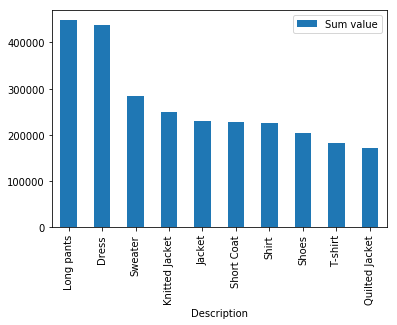

In [75]:
# we get the sum value for each class
class_sum_item_value = basket_table.groupby('Class')['Item value'].sum()
class_sum_item_value = class_sum_item_value.to_frame().reset_index()
class_sum_item_value.columns = ['Class', 'Sum value']
# we arrange the sum value in descending form
sumvalue_ascending_class = class_sum_item_value.sort_values(by=['Sum value'], ascending=False)
# we get the top 10 income classes
ten_max_classes = sumvalue_ascending_class[:10]
ten_max_classes_withdescription = pd.merge(ten_max_classes,class_table,how='left',on='Class')
ten_max_classes_withdescription = ten_max_classes_withdescription.set_index('Class')
ten_max_classes_withdescription = ten_max_classes_withdescription.set_index('Description')

ten_max_classes_withdescription.plot(kind='bar')
plt.show()

### Distribution of sold Product colors and sizes

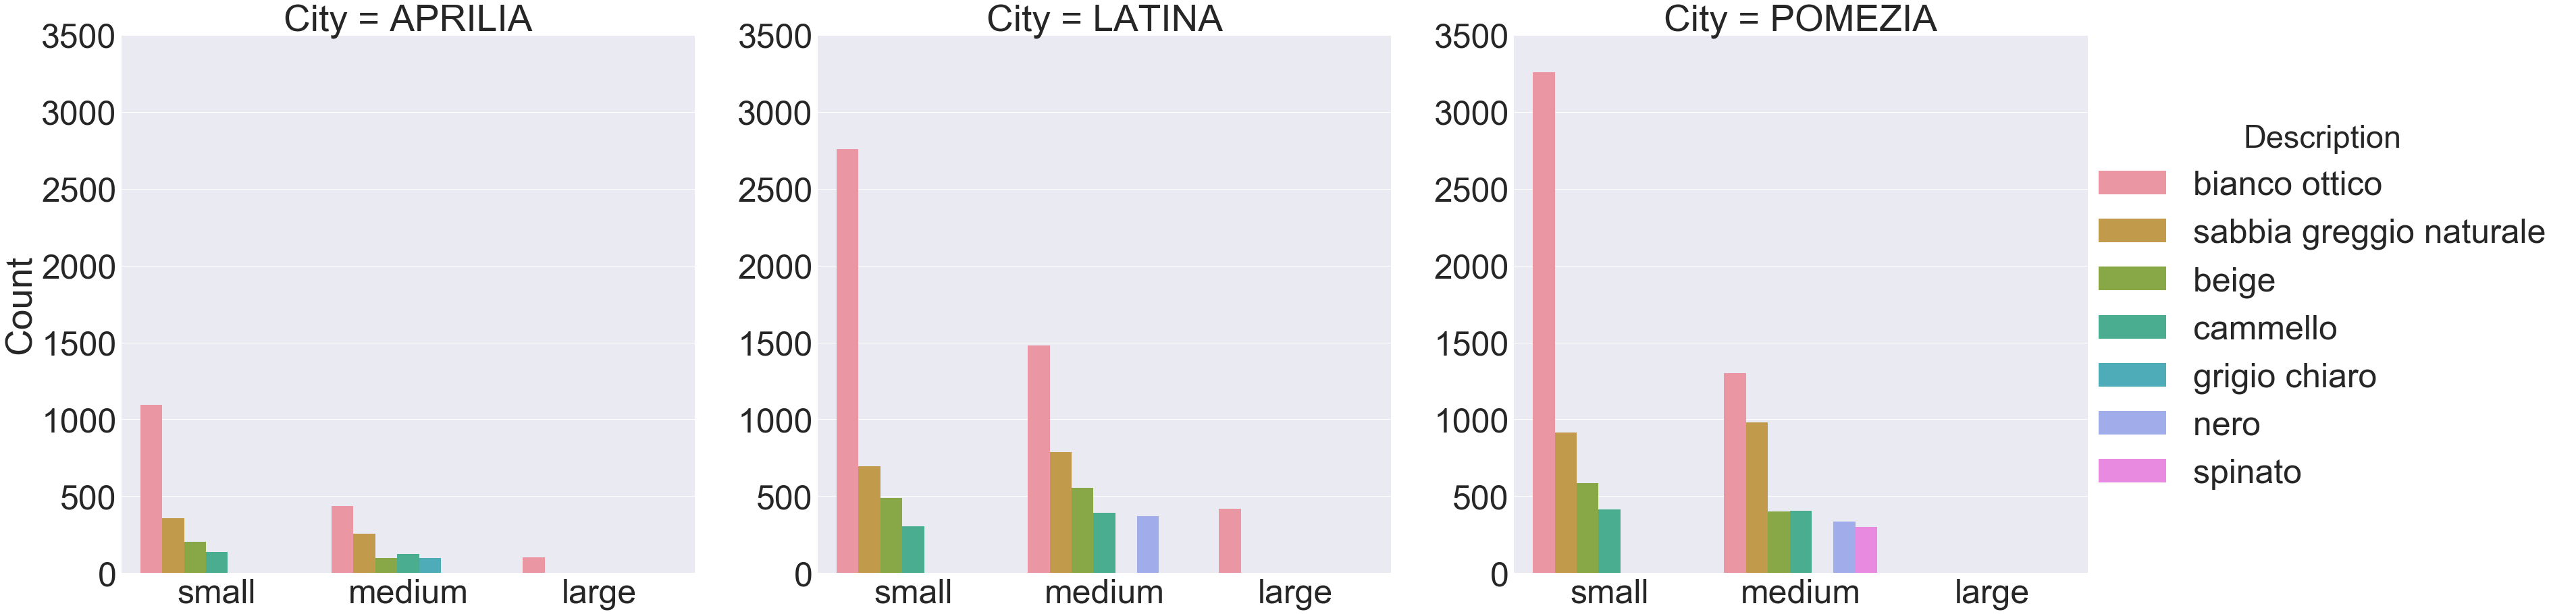

In [97]:
import seaborn

document_basket_table = pd.merge(basket_table,document_table,how='right',on='Document n#')
customer_table = pd.read_excel('customer.xlsx')
document_basket_customer_table = pd.merge(customer_table,document_basket_table,how='inner',on='Customer code')

document_basket_customer_table = document_basket_customer_table.drop(['Day of birth','Document time','Post code','Name','Month of birth'], 1)

# we insert new table columns with default values in order to change them later
document_basket_customer_table['Size'] = 'Size'
document_basket_customer_table['Color'] = 'Color'
document_basket_customer_table

def size(x):
    x = int(str(x)[13:])
    if x < 4:
        return 'small'
    elif x < 7:
        return 'medium'
    else:
        return 'large'
# using the size method we match each product number to a size
document_basket_customer_table['Size'] = document_basket_customer_table['SKU'].map(size)
# using the values 10 and 12 of the SKU we get the color id
document_basket_customer_table['Color'] = document_basket_customer_table['SKU'].apply(lambda x: int(str(x)[10:13]))

color_table = pd.read_csv('colour.txt', sep='\t')
color_table.columns = ["Color", "Description"]
# using the color id from the previus step we get the color name by merging with the color table
document_basket_customer_table_with_colors = pd.merge(document_basket_customer_table,color_table,how='left',on='Color')
# grouping by column Size we count the according document numbers to a specific size
count_of_sizes = document_basket_customer_table_with_colors.groupby("Size")['Document n#'].count()
count_of_color = document_basket_customer_table_with_colors.groupby(['City','Size','Description'])['Document n#'].count().reset_index(name='Count')

count_of_sizes = count_of_sizes.to_frame().reset_index()
count_of_sizes.columns = ['Size', 'Total Sales']
count_of_sizes.set_index('Size', inplace=True)
count_of_color.set_index('City', inplace=True)

# we restrict the dataframes according to our clusters so that we get their demand 
POMEZIA_demand = count_of_color.loc['POMEZIA'].sort_values(by=['Count'], ascending=False)
POMEZIA_highest_demand = POMEZIA_demand[:10]
count_of_color.drop("POMEZIA", axis=0, inplace=True)

LATINA_demand = count_of_color.loc['LATINA'].sort_values(by=['Count'], ascending=False)
LATINA_highest_demand = LATINA_demand[:10]
count_of_color.drop("LATINA", axis=0, inplace=True)

APRILIA_demand = count_of_color.loc['APRILIA'].sort_values(by=['Count'], ascending=False)
APRILIA_demand
APRILIA_highest_demand = APRILIA_demand[:10]
count_of_color.drop("APRILIA", axis=0, inplace=True)

highest_demand_for_clusters = pd.concat([ APRILIA_highest_demand, LATINA_highest_demand, POMEZIA_highest_demand])

highest_demand_for_clusters = highest_demand_for_clusters.reset_index()
highest_demand_for_clusters
fg = seaborn.factorplot(x='Size', y='Count', hue='Description', 
                        col='City', data=highest_demand_for_clusters, kind='bar',size=15, aspect=1)
fg.set_xlabels('')
seaborn.set(font_scale=5)
plt.plot(figsize=(5,5))
plt.ylim(0, 3500)
plt.show()

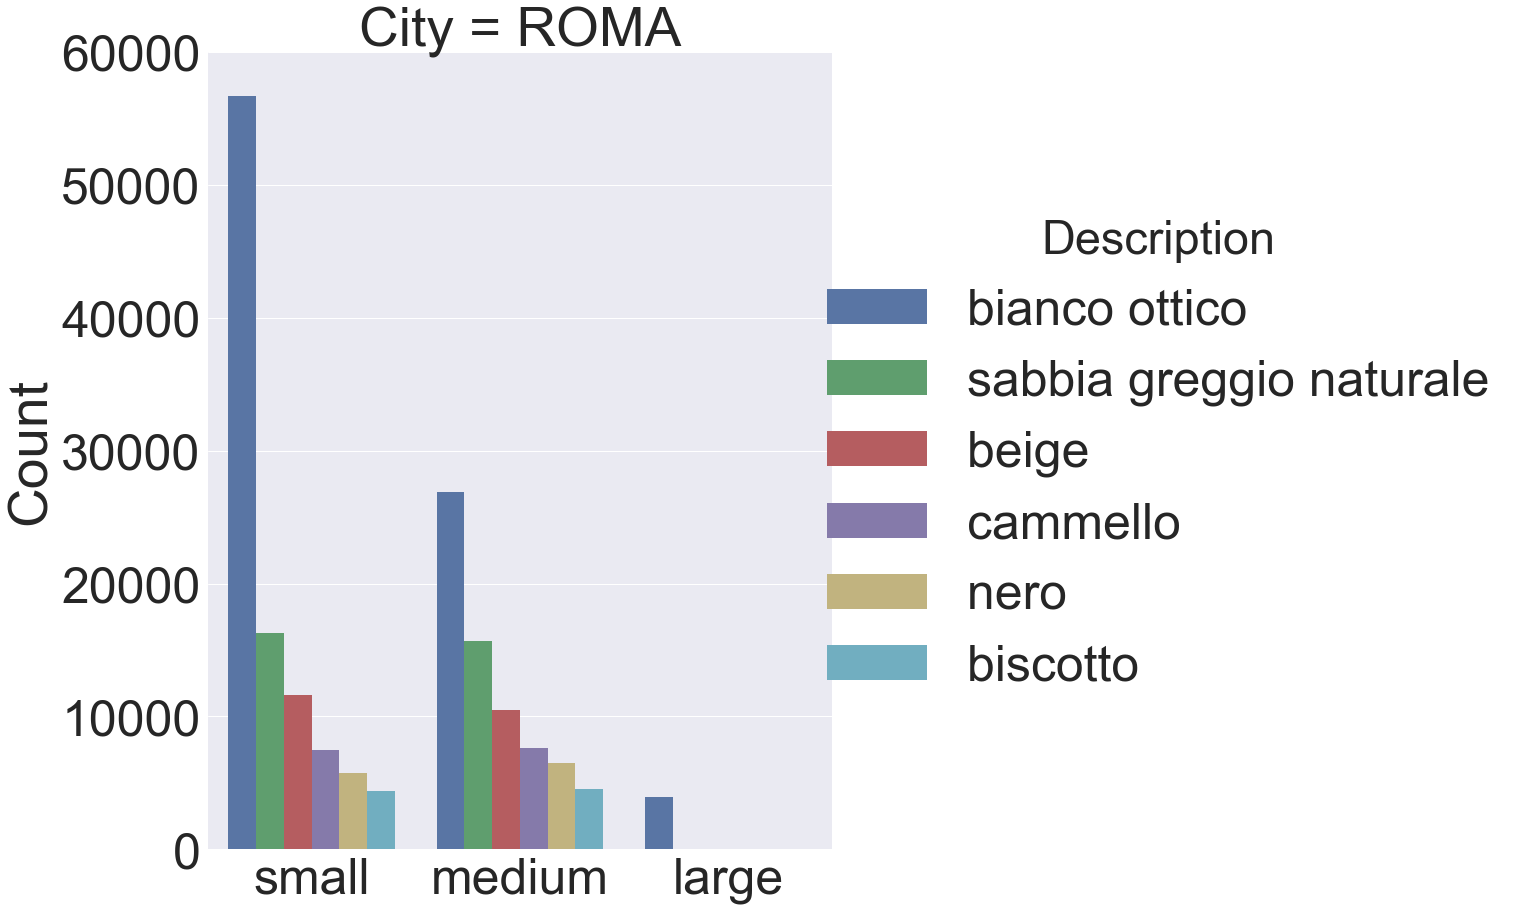

In [99]:
# here we get the demand for the city Roma which needed to be in a separate graph due to its size
roma_demand = count_of_color.loc['ROMA'].sort_values(by=['Count'], ascending=False)
roma_highest_demand = roma_demand[:13]

roma_highest_demand = roma_highest_demand.reset_index()

fg = seaborn.factorplot(x='Size', y='Count', hue='Description', 
                        col='City', data=roma_highest_demand, kind='bar',size=15, aspect=1)
fg.set_xlabels('')
seaborn.set(font_scale=5)
# fg.set_size_inches(11.7, 8.27)
plt.plot(figsize=(10,10))
plt.ylim(0, 60000)
plt.show()

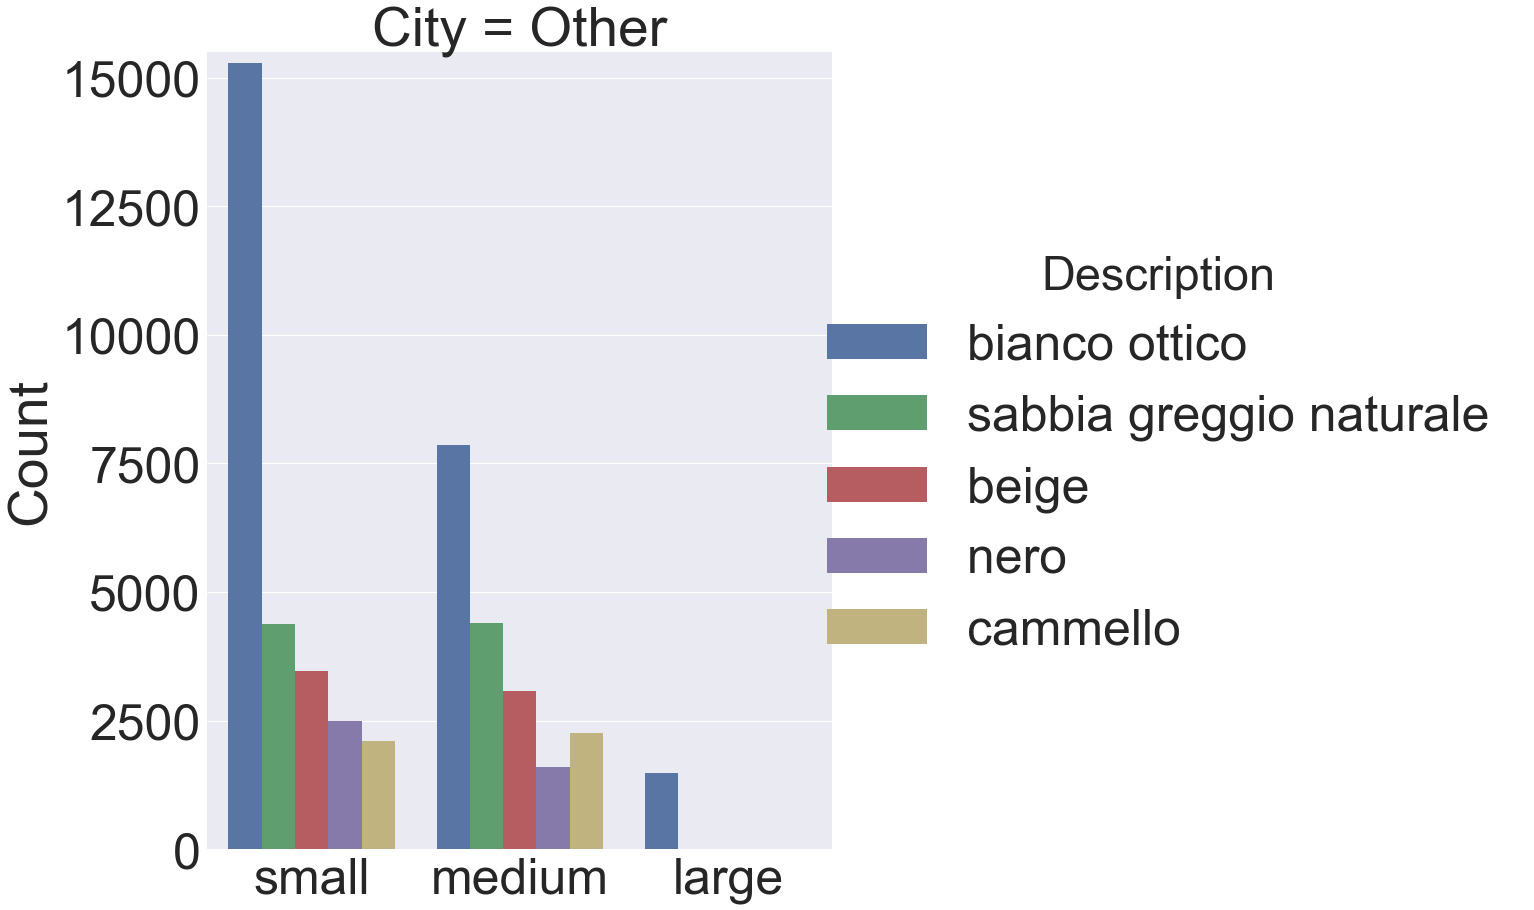

In [100]:
count_of_color.drop("ROMA", axis=0, inplace=True)

other_demand = count_of_color.sort_values(by=['Count'], ascending=False)
other_demand = other_demand.groupby(["Description","Size"])["Count"].sum()

other_demand = other_demand.to_frame().reset_index()
other_demand.columns = ['Description', 'Size','Count']
other_demand = other_demand.sort_values('Count', ascending=False)
other_demand['City'] = 'Other'
other_highest_demand = other_demand[:11]

other_highest_demand = other_highest_demand.reset_index()
fg = seaborn.factorplot(x='Size', y='Count', hue='Description', 
                        col='City', data=other_highest_demand, kind='bar',size=15, aspect=1)
fg.set_xlabels('')
seaborn.set(font_scale=5)
# fg.set_size_inches(11.7, 8.27)
plt.plot(figsize=(10,10))
plt.ylim(0, 15500)
plt.show()